# SingleMuon_Run2015D

author: thomas.mccauley@cern.ch

In [6]:
import uproot4
import awkward as ak
import vector

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from particle import Particle
from hepunits import GeV

In [74]:
data = uproot4.open('/home/mccauley/cms-wmass-skim/CMSSW_7_6_7/src/skim/MiniAOD2NanoAODOutreachTool/SingleMuon_Run2015D.root:miniaod2nanoaod')

The events have passed the following selections:

* Precisely one muon in the event
* $p_t$ > 10 GeV
* $|\eta|$ < 2.4
* Muon is a global muon
* Reject if electron in event

In [75]:
data['Events'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HLT_IsoMu24_eta2p1   | bool                     | AsDtype('bool')
HLT_IsoMu24          | bool                     | AsDtype('bool')
HLT_IsoMu17_eta2p... | bool                     | AsDtype('bool')
PV_npvs              | int32_t                  | AsDtype('>i4')
PV_x                 | float                    | AsDtype('>f4')
PV_y                 | float                    | AsDtype('>f4')
PV_z                 | float                    | AsDtype('>f4')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]               

In [76]:
events = data['Events'].arrays(library="ak", how="zip")
ak.type(events)

ArrayType(RecordType([NumpyType('int32'), NumpyType('uint32'), NumpyType('uint64'), NumpyType('bool'), NumpyType('bool'), NumpyType('bool'), NumpyType('int32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('uint32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), ListType(RecordType([NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('int32'), NumpyType('float32'), NumpyType('float32'), NumpyType('bool'), NumpyType('bool'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('int32'), NumpyType('int32')], ['pt', 'eta', 'phi', 'mass', 'charge', 'pfRelIso03_all', 'pfRelIso04_all', 'tightId', 'softId', 'dxy', 'dxyErr', 'dz', 'dzErr', 'jetIdx', 'genPartIdx']))], ['run', 'luminosityBlock', 'event', 'HLT_IsoMu24_eta2p1', 'HLT_IsoMu24', 'HLT_IsoMu17_eta2p1_LooseIsoP

In [77]:
len(events)

170360

In [78]:
vector.register_awkward()

In [79]:
muons = ak.zip({
    "pt": events.Muon.pt,
    "eta": events.Muon.eta,
    "phi": events.Muon.phi,
    "mass": events.Muon.mass,
    "charge": events.Muon.charge
})

In [80]:
df = ak.to_dataframe(events)

/home/mccauley/.local/lib/python3.10/site-packages/awkward/operations/ak_to_dataframe.py:159: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  out = pandas.merge(out, df, how=how, left_index=True, right_index=True)


In [81]:
df.columns

Index([                               'run',
                          'luminosityBlock',
                                    'event',
                       'HLT_IsoMu24_eta2p1',
                              'HLT_IsoMu24',
       'HLT_IsoMu17_eta2p1_LooseIsoPFTau20',
                                  'PV_npvs',
                                     'PV_x',
                                     'PV_y',
                                     'PV_z',
                                    'nMuon',
                                   'MET_pt',
                                  'MET_phi',
                                'MET_sumet',
                         'MET_significance',
                                'MET_CovXX',
                                'MET_CovXY',
                                'MET_CovYY',
                             ('Muon', 'pt'),
                            ('Muon', 'eta'),
                            ('Muon', 'phi'),
                           ('Muon', 'mass'),
          

In [82]:
df.rename(
    columns={
        ("Muon", "pt"): "pt",
        ("Muon", "eta"): "eta",
        ("Muon", "phi"): "phi",
        ("Muon", "mass"): "mass",
        ("Muon", "charge"): "charge",
        ("Muon", "pfRelIso03_all"): "pfRelIso03_all",
        ("Muon", "pfRelIso04_all"): "pfRelIso04_all",
        ("Muon", "tightId"): "tightId",
        ("Muon", "softId"): "softId",
        ("Muon", "dxy"): "dxy", 
        ("Muon", "dxyErr"): "dxyErr",
        ("Muon", "dz"): "dz",
        ("Muon", "dzErr"): "dzErr",
        ("Muon", "jetIdx"): "jetIdx",
        ("Muon", "genPartIdx"): "genPartIdx"
    }, 
    inplace=True
)

In [83]:
df.drop(
    [
        'HLT_IsoMu24_eta2p1',
        'HLT_IsoMu24',
        'HLT_IsoMu17_eta2p1_LooseIsoPFTau20',
        'jetIdx',
        'genPartIdx',
    ], 
    inplace=True,
    axis=1,
)

In [84]:
df.head()

,,run,luminosityBlock,event,PV_npvs,PV_x,PV_y,PV_z,nMuon,MET_pt,MET_phi,...,mass,charge,pfRelIso03_all,pfRelIso04_all,tightId,softId,dxy,dxyErr,dz,dzErr
entry,subentry,,,,,,,,,,,,,,,,,,,,,
2,0,256941,192,275018551,10,0.075702,0.091688,-1.663768,1,15.164558,1.297838,...,0.1057,-1,0.068692,0.217615,True,True,0.001022,0.001240,-0.000723,0.004114
3,0,256941,192,275425558,12,0.078678,0.086841,-2.100620,1,39.461658,-3.002506,...,0.1057,-1,0.113458,0.113458,True,True,-0.005721,0.001544,-0.015182,0.003140
4,0,256941,192,275635914,10,0.078664,0.091752,7.563691,1,10.103862,2.378748,...,0.1057,-1,0.011042,0.011042,True,True,-0.000002,0.000818,0.001291,0.002649
5,0,256941,192,275246630,8,0.076234,0.091418,-1.938838,1,24.851316,-2.415389,...,0.1057,-1,0.007894,0.007894,True,True,-0.000014,0.001237,-0.000394,0.004430
7,0,256941,192,274509464,9,0.075960,0.095580,1.259584,1,10.024513,-2.520149,...,0.1057,1,0.000000,0.000000,True,True,-0.000689,0.001403,0.002282,0.005863


In [85]:
df['Mt'] = np.sqrt(2*df.pt*df.MET_pt*(1-np.cos(df.phi-df.MET_phi)))

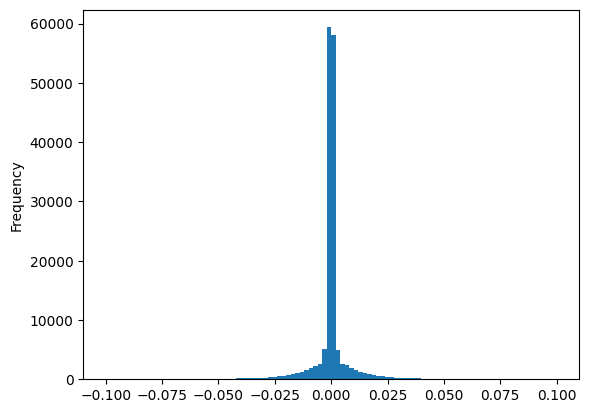

In [86]:
df['dxy'].plot(kind='hist', range=(-0.1,0.1), bins=100)
plt.show()

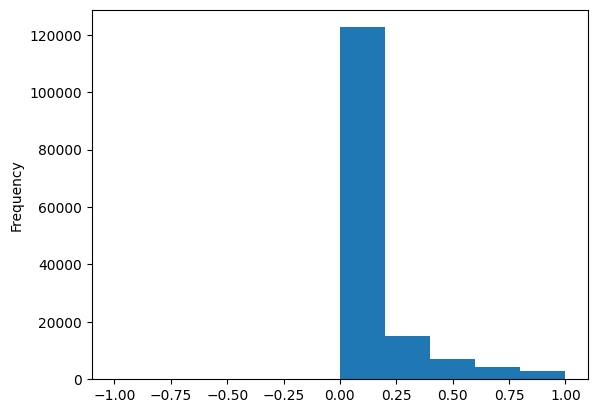

In [87]:
df['pfRelIso03_all'].plot(kind='hist', range=(-1,1))
plt.show()

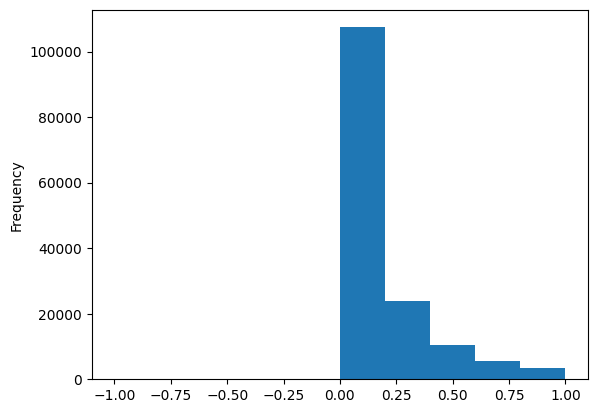

In [88]:
df['pfRelIso04_all'].plot(kind='hist', range=(-1,1))
plt.show()

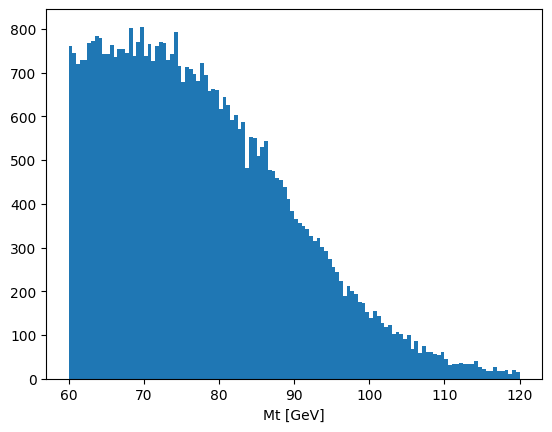

In [89]:
df['Mt'].plot(kind='hist', range=(60, 120), bins=120)
plt.xlabel('Mt [GeV]')
plt.ylabel('')
plt.show()

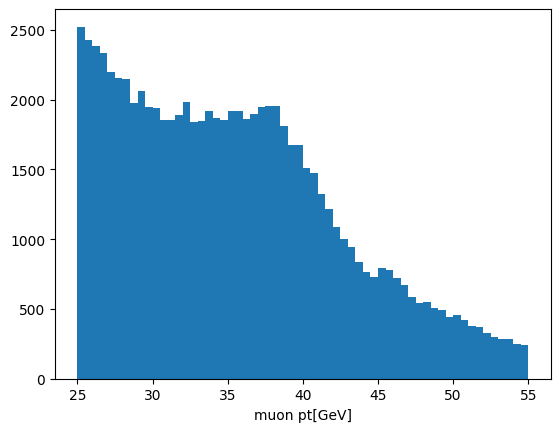

In [90]:
df['pt'].plot(kind='hist', range=(25, 55), bins=60)
plt.xlabel('muon pt[GeV]')
plt.ylabel('')
plt.show()

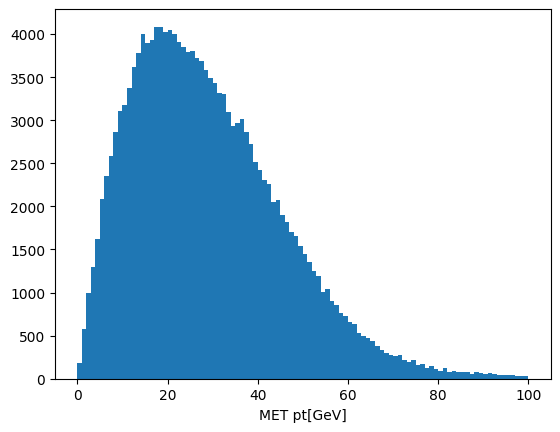

In [103]:
df['MET_pt'].plot(kind='hist', range=(0, 100), bins=100)
plt.xlabel('MET pt[GeV]')
plt.ylabel('')
plt.show()

In [99]:
select = df[(df.pt > 25) & (df.pt < 55) & (df.pfRelIso03_all < 0.15) & (df.Mt > 40)]

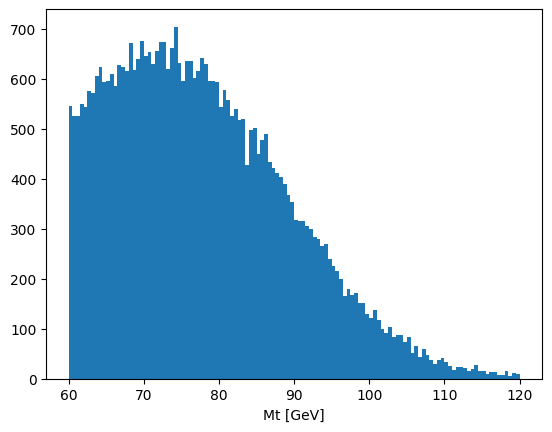

In [100]:
select['Mt'].plot(kind='hist', range=(60, 120), bins=120)
plt.xlabel('Mt [GeV]')
plt.ylabel('')
plt.show()

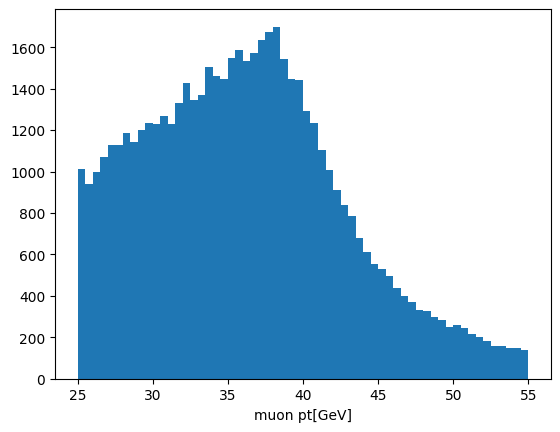

In [101]:
select['pt'].plot(kind='hist', range=(25, 55), bins=60)
plt.xlabel('muon pt[GeV]')
plt.ylabel('')
plt.show()

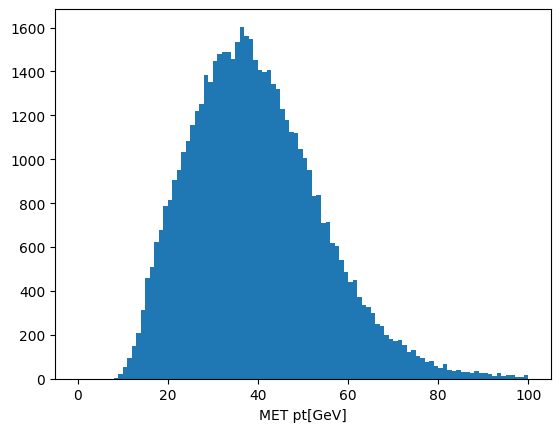

In [104]:
select['MET_pt'].plot(kind='hist', range=(0, 100), bins=100)
plt.xlabel('MET pt[GeV]')
plt.ylabel('')
plt.show()

In [45]:
df.to_csv('SingleMuon.csv')